<a href="https://colab.research.google.com/github/WambuiMunene/Tensorflow-Notebooks/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
# Load the data
mnist = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
# scale X_train and X_test
X_train, X_test = X_train / 255.0 , X_test/255.0
print("X_train.shape:" , X_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train.shape: (60000, 28, 28)


In [5]:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Flatten, Dropout
# from tensorflow.keras.models import Sequential

# model = Sequential([
#     Flatten(input_shape = (28.28)),
#     Dense(128, activarion='relu'),
#     Dropout(0.2)
#     Dense(10, activation='softmax')


#                     ])


In [8]:
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten (input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')


])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the Model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8573 - loss: 0.4828 - val_accuracy: 0.9616 - val_loss: 0.1346
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9551 - loss: 0.1523 - val_accuracy: 0.9718 - val_loss: 0.0977
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9672 - loss: 0.1095 - val_accuracy: 0.9715 - val_loss: 0.0892
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9740 - loss: 0.0877 - val_accuracy: 0.9763 - val_loss: 0.0767
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9768 - loss: 0.0746 - val_accuracy: 0.9782 - val_loss: 0.0731
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9801 - loss: 0.0633 - val_accuracy: 0.9764 - val_loss: 0.0786
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9810 - loss: 0.0575 - val_accuracy: 0.9766 - val_loss: 0.0774
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9825 - loss: 0.0541 - 

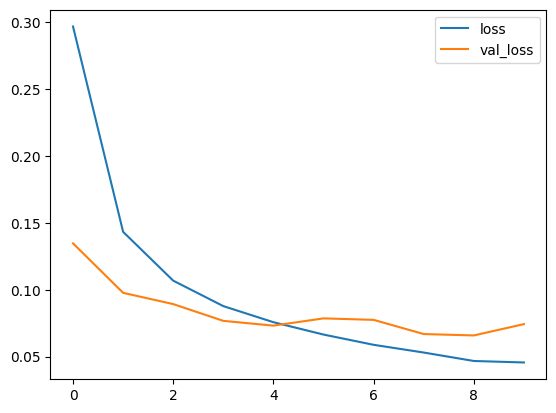

In [15]:
# Plot loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history ['loss'], label='loss')
plt.plot(r.history ['val_loss'], label = 'val_loss')
plt.legend();

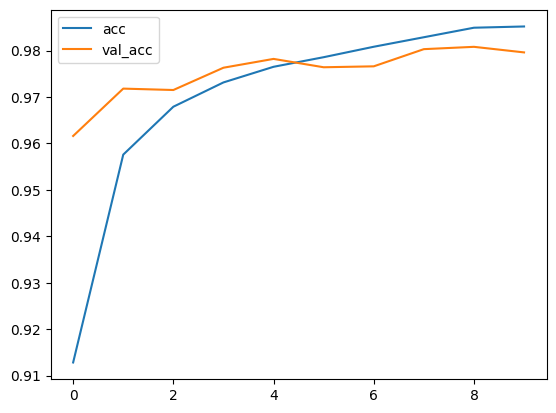

In [16]:
# Plot accuracy per iteration
plt.plot(r.history ['accuracy'], label='acc')
plt.plot(r.history ['val_accuracy'], label='val_acc')
plt.legend();

In [17]:
# Evaluate the model
print(model.evaluate(X_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0932
[0.07427247613668442, 0.9796000123023987]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


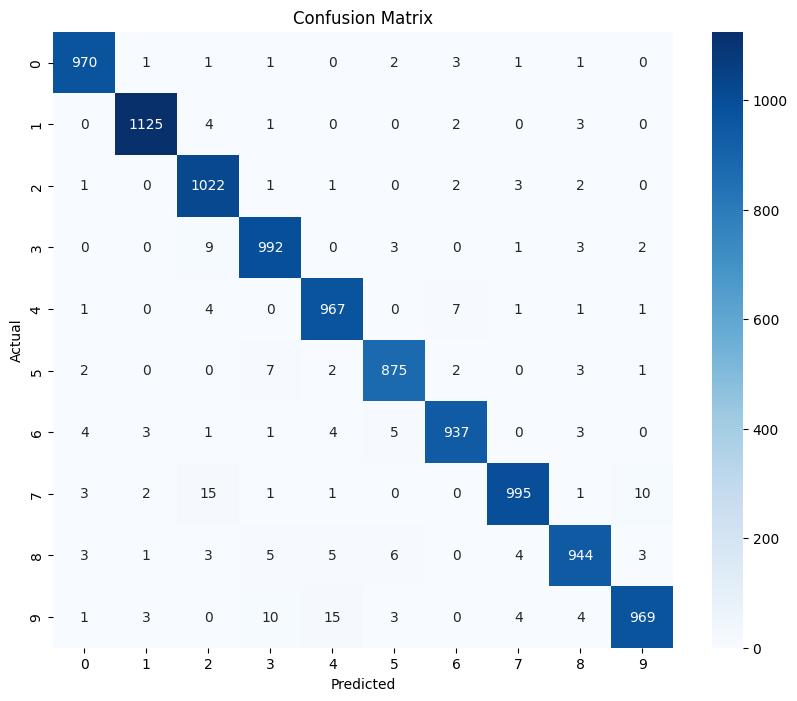

In [18]:
# plot a confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions for your test data
y_pred = model.predict(X_test)
# Convert predictions to class labels
y_pred_classes = y_pred.argmax(axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Define the class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:
# Show some misclassified examples
import numpy as np
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')


NameError: name 'p_test' is not defined